<a href="https://colab.research.google.com/github/sueshow/Data_Science_Marathon/blob/main/%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E6%A8%A1%E5%9E%8B_%E7%AF%84%E4%BE%8BIris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入套件

In [ ]:
# Importing Modules
import numpy as np       
import pandas as pd     

# hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
# Kmean
from sklearn import cluster, datasets, metrics
# KMedoids
#from sklearn_extra.cluster import KMedoids
# t-sne
from sklearn.manifold import TSNE
# DBSCAN
#from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM

import seaborn as sns   
import matplotlib.pyplot as plt                      # 繪製影像 
from mpl_toolkits.mplot3d import Axes3D              # 繪製3D圖形

# 讀入鳶尾花資料

In [ ]:
# Loading dataset
iris = datasets.load_iris()                                                     # 將一個dict型別資料存入iris
iris_X = pd.DataFrame( iris['data'], columns=iris['feature_names'] )
iris_Y = pd.DataFrame( iris['target'], columns=['target_names'] )
iris_data = pd.concat( [iris_X, iris_Y], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
sns.set()
iris_sns = sns.load_dataset('iris')
print(iris_sns) # 輸出檢視資料

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
X_iris = iris_sns.drop('species', axis=1)
y_iris = iris_sns['species']

## 資訊

In [ ]:
# Available methods on dataset
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [ ]:
for key, value in iris.items() :
    try:
        print(key,':',value.shape)
    except:
        print(key,':')

data : (150, 4)
target : (150,)
target_names : (3,)
DESCR :
feature_names :
filename :


In [ ]:
print('feature_names:', iris['feature_names'])
print('='*20)
print('target_names:', iris['target_names'])
print('='*20)
print('filename:', iris['filename'])
label = {0: 'red', 1: 'blue', 2: 'green'}

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
filename: /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv


## 視覺化

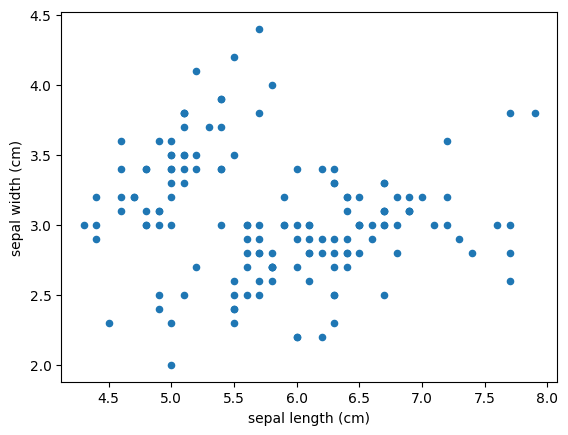

In [ ]:
plt.style.use( 'default' )  #還原原始設定

# Plotting
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)' )

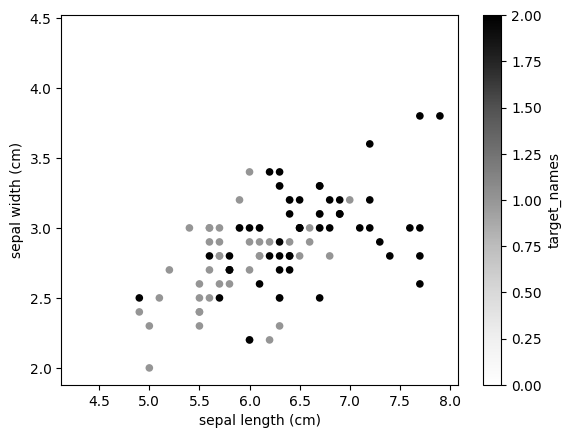

In [ ]:
# Plotting
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)', c='target_names' )
#plt.show()

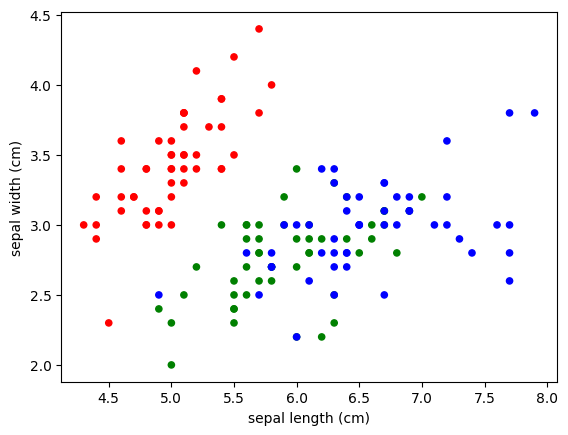

In [ ]:
color = {
          0:'r',
          1:'g',
          2:'b'
}
iris_data['color'] = iris_data['target_names'].map( color)
iris_data.plot.scatter( x='sepal length (cm)', y='sepal width (cm)', c=iris_data['color'] )

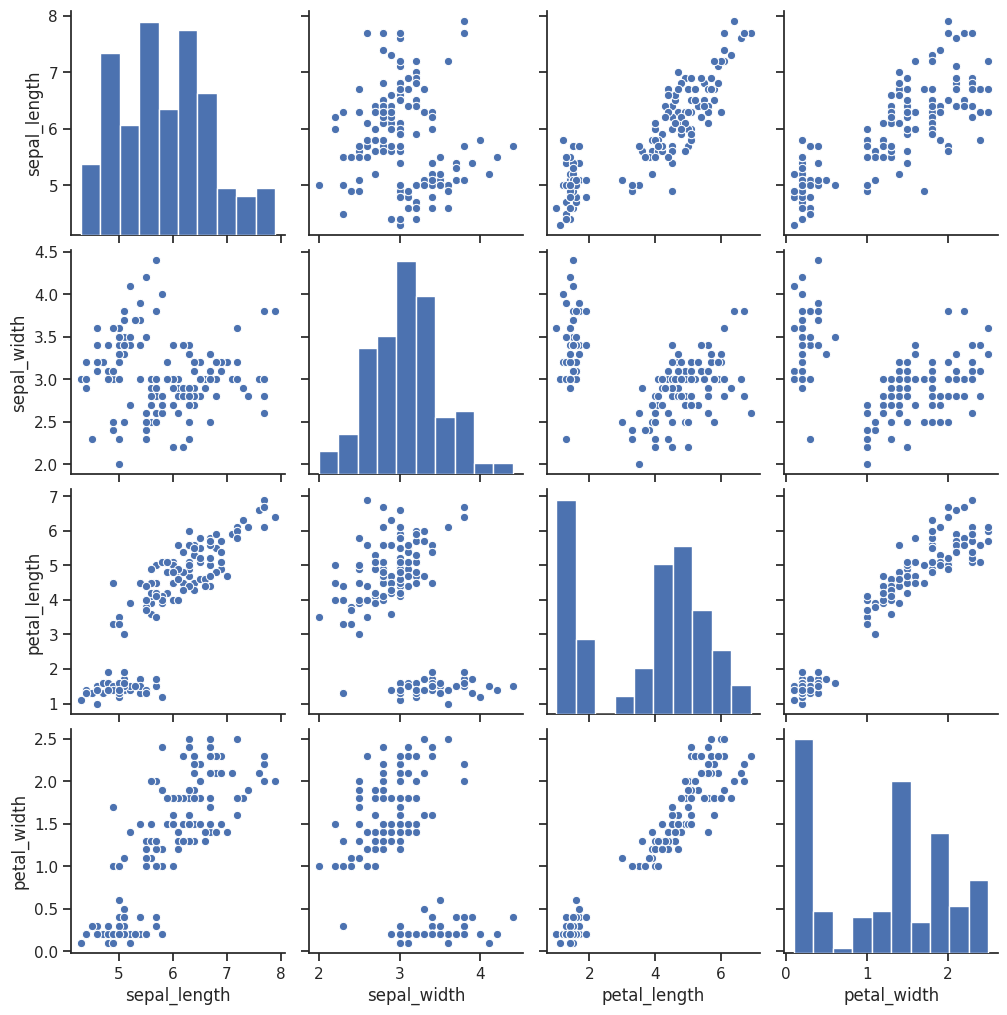

In [ ]:
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
g = sns.pairplot(iris)

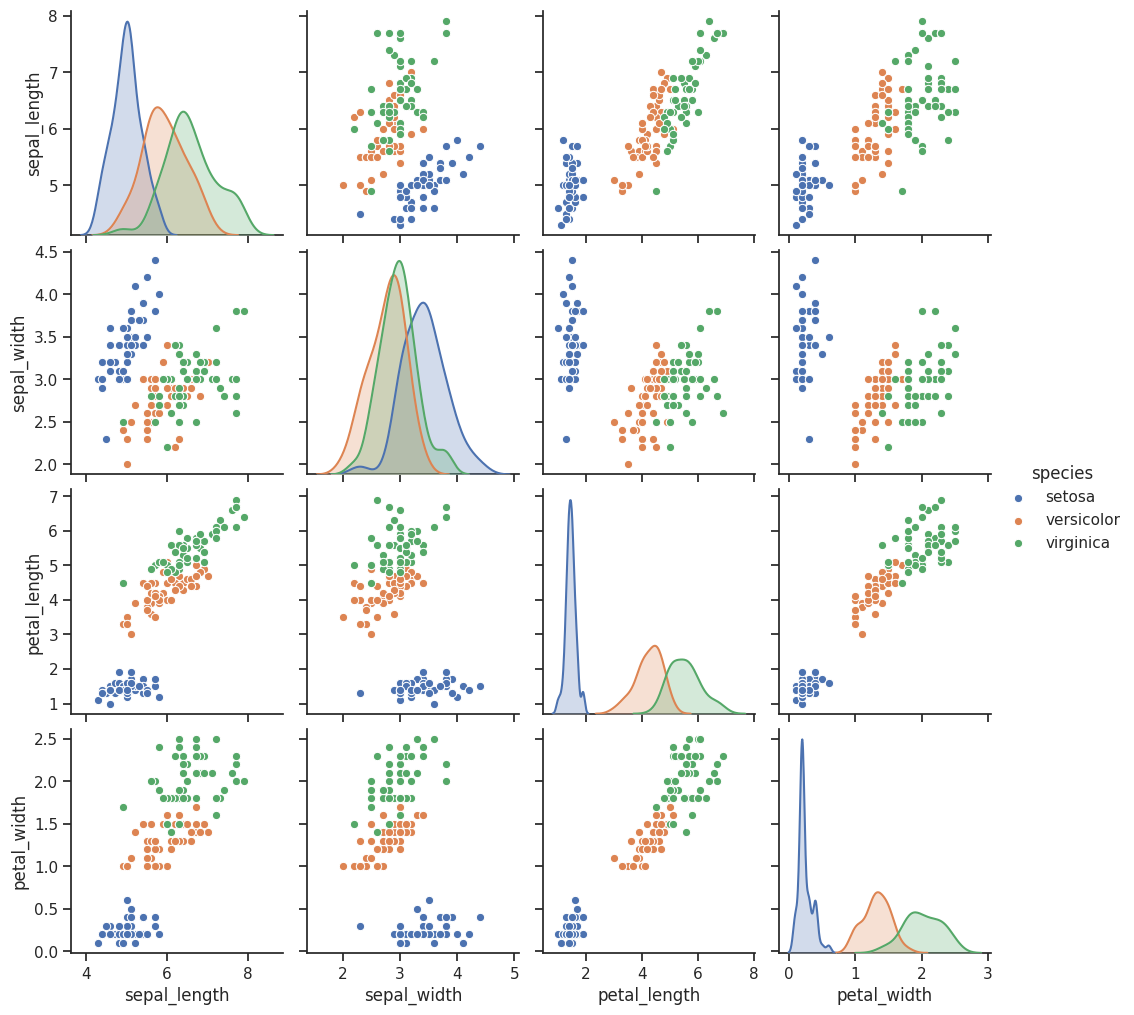

In [ ]:
g = sns.pairplot(iris, hue='species')

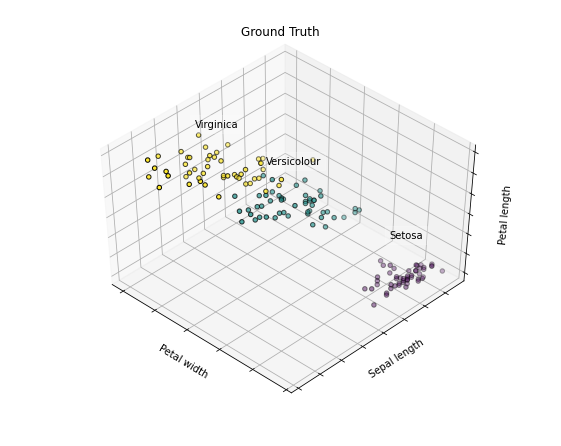

In [ ]:
iris = datasets.load_iris()
iris_X_2 = iris.data
iris_Y_2 = iris.target

fignum = 1
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris_X_2[iris_Y_2 == label, 3].mean(),
              iris_X_2[iris_Y_2 == label, 0].mean(),
              iris_X_2[iris_Y_2 == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(iris_Y_2, [1, 2, 0]).astype(np.float)
ax.scatter(iris_X_2[:, 3], iris_X_2[:, 0], iris_X_2[:, 2], c=iris_Y_2, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

# Hierarchical Clustering

## 不需要設定 k 值
* Hierarchical Clustering 演算法每一次只將兩個觀測值歸為一類，然後在演算過程中得到 k = 1 一直到 k = n（觀測值個數）群的結果

In [ ]:
hclust = cluster.AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)

In [ ]:
# 印出分群結果
hclust.fit(iris_X_2)
cluster_labels = hclust.labels_
print('分群結果：\n',cluster_labels)
print('---')
print('真實品種：\n',iris_Y_2)

分群結果：
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
真實品種：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 比較

In [ ]:
def calc_acc(y_p, y):
# 計算準確率子函式
    return sum(y_p==y)/y.shape[0]

In [ ]:
# 顯示預測準確率
acc = calc_acc(iris_Y_2, cluster_labels)
print('the accuracy is', acc) 

the accuracy is 0.23333333333333334


* 使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。



In [ ]:
# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X_2, cluster_labels)
print('結果：\n',silhouette_avg)

結果：
 0.5543236611296415


## 範例

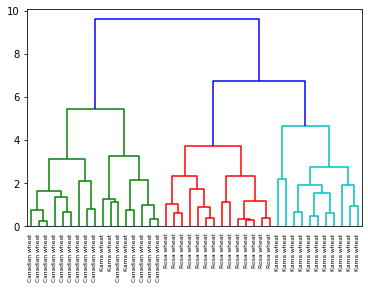

In [ ]:
# Reading the DataFrame
seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

mergings = linkage(samples, method='complete')

dendrogram(
    mergings,
    labels=varieties,
    leaf_rotation=90,
    leaf_font_size=6,
)

plt.show()

# KMeans 演算法
* 優點：
  * 計算速度快，且容易理解
* 缺點：
  * 演算法的基礎是計算資料點的中心，沒有方向性，適合處理凸型 (Convex) 群組， 對於分散、歪斜、或凹形 (Concave) 群組效果不佳
  * 平均值的算法易受極端值得影響，且對於類別型變數來講需考慮計算平均值並無意義，故只適用於數值型的資料。另外，當樣本數量差異過大時，也較無法達到良好的分類效果。

寫法一

In [ ]:
kmeans_fit = cluster.KMeans(n_clusters=3, random_state=100).fit(iris_X)
cluster_labels = kmeans_fit.labels_

In [ ]:
# 印出分群結果
print('分群結果：\n',cluster_labels)
print('---')
print('真實品種：\n',iris_Y_2)
print('---')

分群結果：
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
---
真實品種：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
---


寫法二

In [ ]:
# Declaring Model
model = cluster.KMeans(n_clusters=3)
# Fitting Model
model.fit(iris_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_X)

# Printing Predictions
print(predicted_label)
print('---')
print('分群結果：\n',all_predictions)
print('---')
print('真實品種：\n', iris_Y_2)

[1]
---
分群結果：
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
真實品種：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 比較

In [ ]:
# 顯示預測準確率
acc = calc_acc(iris_Y_2, cluster_labels)
print('the accuracy is', acc) 

the accuracy is 0.09333333333333334


* 使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。

In [ ]:
# 印出中心點 
cluster_centers = kmeans_fit.cluster_centers_ 
print('分群中心：\n',cluster_centers)
print('---')

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print('結果：\n',silhouette_avg)

分群中心：
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
---
結果：
 0.5528190123564091


## 視覺化

Text(0.5, 1.0, 'K means Classification')

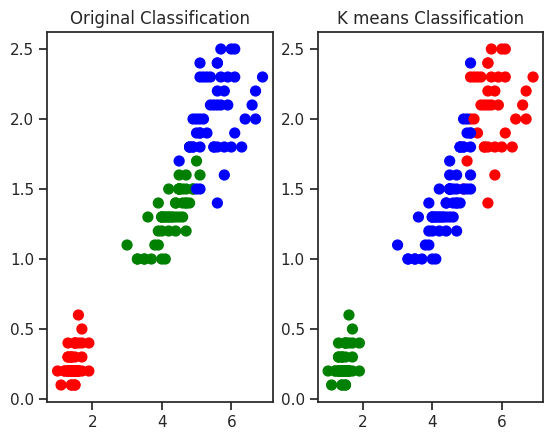

In [ ]:
iris_df = pd.DataFrame( iris.data )
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#relabel = np.choose(cluster_labels, [2,0,1]).astype(np.int64)
colors = np.array(['Red','Green','Blue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal_length'], y=iris_df['petal_width'], c=colors[iris.target], s=50)
plt.title('Original Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal_length'], y=iris_df['petal_width'], c=colors[cluster_labels], s=50)
plt.title('K means Classification')

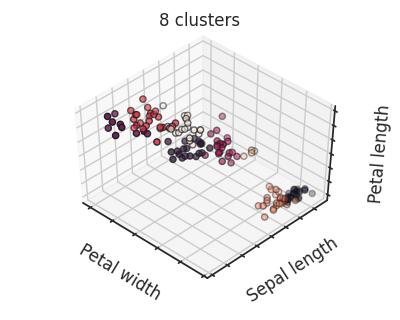

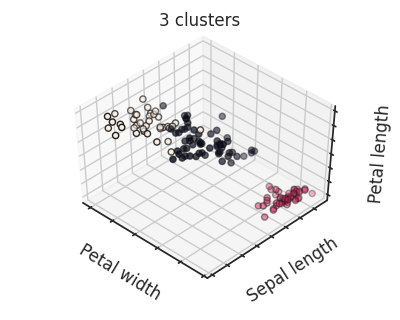

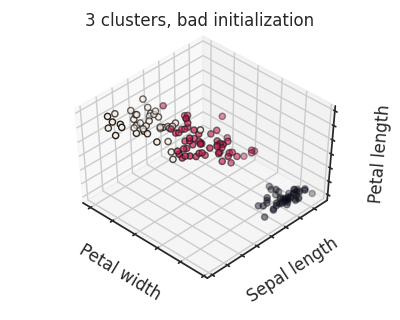

In [ ]:
estimators = [('k_means_iris_8', cluster.KMeans(n_clusters=8)),
              ('k_means_iris_3', cluster.KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', cluster.KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(iris_X_2)
    labels = est.labels_

    ax.scatter(iris_X_2[:, 3], iris_X_2[:, 0], iris_X_2[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
  
fig.show()

## 如何選擇 k 值
* 隨著 k 值的增加，K-Means 演算法的績效一定會愈來愈好，當 k = 觀測值數目的時候，我們會得到一個組間差異最大，組內差異最小的結果。

In [ ]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

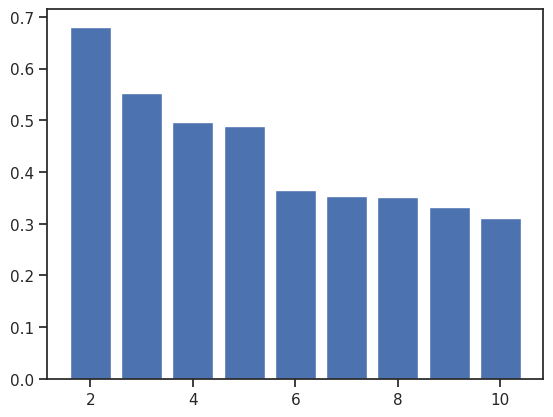

In [ ]:
# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()

## 調整參數

* n_clusters:群集數量
* init:初始中心方法
* n_init:獲取初始中心的疊代次數
* tol : tolerance 即收斂的條件
* n_jobs: 工作的數量(平行運算用)，-1為全力用CPU跑
* 要解決中心點問題可以依靠k-maens++，k-means++的方法就是讓初始中心之間的距離盡可能地遠使得加速迭代過程的收斂。

In [ ]:
kmeans_fit01 = cluster.KMeans(n_clusters=3, 
                              init='k-means++', 
                              n_init=10, 
                              max_iter=300, 
                              tol=0.0001, 
                              n_jobs=1, ).fit(iris_X) 

In [ ]:
# 印出分群結果
cluster_labels = kmeans_fit01.labels_
print('分群結果：\n',cluster_labels)
print('---')
print('真實品種：\n',iris_Y_2)
print("---")
# 印出中心點 
cluster_centers = kmeans_fit01.cluster_centers_ 
print('分群中心：\n',cluster_centers)
print('---')
# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print('結果：\n',silhouette_avg)
print('---')
# 顯示預測準確率
acc = calc_acc(iris_Y_2, cluster_labels)
print('the accuracy is', acc) 

分群結果：
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
---
真實品種：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
---
分群中心：
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
---
結果：
 0.5528190123564091
---
the accuracy is 0.32


## Train vs. Test

In [ ]:
def mode(a):
# 求眾數子函式
    counts = np.bincount(a)  
    return np.argmax(counts)

def calc_acc(y_p, y):
# 計算準確率子函式
    return sum(y_p==y)/y.shape[0]

In [ ]:
# 隨機劃分訓練集和測試集
num = iris_X_2.shape[0] # 樣本總數
ratio = 7/3 # 劃分比例，訓練集數目:測試集數目
num_test = int(num/(1+ratio)) # 測試集樣本數目
num_train = num -  num_test # 訓練集樣本數目
index = np.arange(num) # 產生樣本標號
np.random.shuffle(index) # 洗牌
x_test = iris_X_2[index[:num_test],:] # 取出洗牌後前 num_test 作為測試集
y_test = iris_Y_2[index[:num_test]]
x_train = iris_X_2[index[num_test:],:] # 剩餘作為訓練集
y_train = iris_Y_2[index[num_test:]]

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x_train)

centers = kmeans.cluster_centers_
for i in range(3):
    index = y_train == i
    p = kmeans.predict(x_train[index,:])
    pp = mode(p) # 求實際類別為 i 所對應的類別標號 pp
    kmeans.cluster_centers_[i] = centers[pp] # 相應的調整類別標號，以正確預測

y_test_pre = kmeans.predict(x_test)
print('y_test_pre：\n', y_test_pre)
print('y_test：\n', y_test)

# 計算分類準確率
acc = calc_acc(y_test_pre, y_test)
print('the accuracy is \n', acc) # 顯示預測準確率

y_test_pre：
 [1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0
 1 1 0 1 1 0 1 1]
y_test：
 [2 2 1 0 2 0 2 2 0 1 0 0 0 1 0 2 0 2 0 1 2 1 1 0 1 1 2 2 0 2 2 2 0 0 0 2 0
 2 2 0 1 1 0 2 1]
the accuracy is 
 0.6222222222222222


# K-Medoids
* 中心點為實際樣本點，且新中心點的決定方式為選取使群內距離和最小的點

In [ ]:
KMed = KMedoids(n_clusters=3, init='random', random_state=5)
KMed.fit(iris_X)

NameError: ignored

In [ ]:
KMed.predict(iris_X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=KMed.predict(iris_X))

# t-SNE 集群 
這裡 Iris 數據集具有四個特徵（4d），它被變換並以二維圖形表示。類似地，t-SNE 模型可以應用於具有 n 個特徵的數據集。

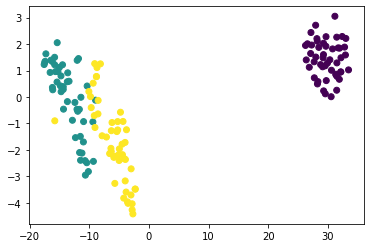

In [ ]:
# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_X_2)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis, c=iris_Y_2)

plt.show()

# DBSCAN聚類
* Density-based spatial clustering，密度空間分群
* 有 min_samples (最少樣本數) 與 eps (距離) 兩個參數。eps 參數是在同一小區中考慮的兩個數據點之間的最大距離。min_samples 參數是社區中被視為集群的最小數據點數量
* 以某資料點為中心，在其周圍的 eps 範圍裡若有 min_samples 以上個資料點，則此區域稱為密集區 (Dense region)
* 在密集區的資料點稱為核心樣本或核心點 (Core samples, core points)
* 不在密集區的資料點被歸類為雜訊 (Noise)，亦即不屬於任何群組
* 優點：
  * 使用者不需要設定群組數，可應付複雜的群組形狀，也可以分辨不屬於任何群組的資料點
* 缺點：

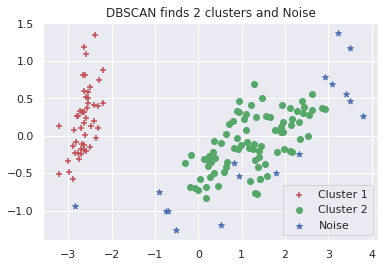

In [ ]:
# Declaring Model
dbscan = cluster.DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')

plt.show()

# 高斯混合模型

PCA降維

In [ ]:
model = PCA(n_components=2)       # 設定超引數, 初始化模型
model.fit(X_iris)                 # 進行擬合
X_2D = model.transform(X_iris)    # 將資料轉化為二維

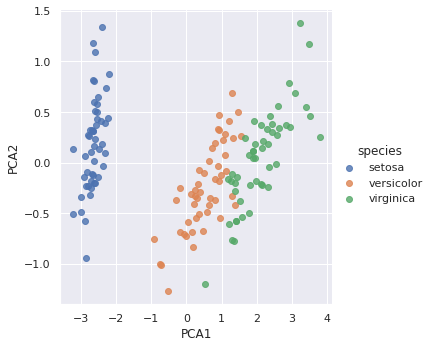

In [ ]:
iris_sns['PCA1'] = X_2D[:, 0]
iris_sns['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_sns, fit_reg=False)

In [ ]:
model = GMM(n_components=3, covariance_type='full') # 設定超引數
model.fit(X_iris)                                           # 擬合數據
y_gmm = model.predict(X_iris)                               # 確定簇標籤

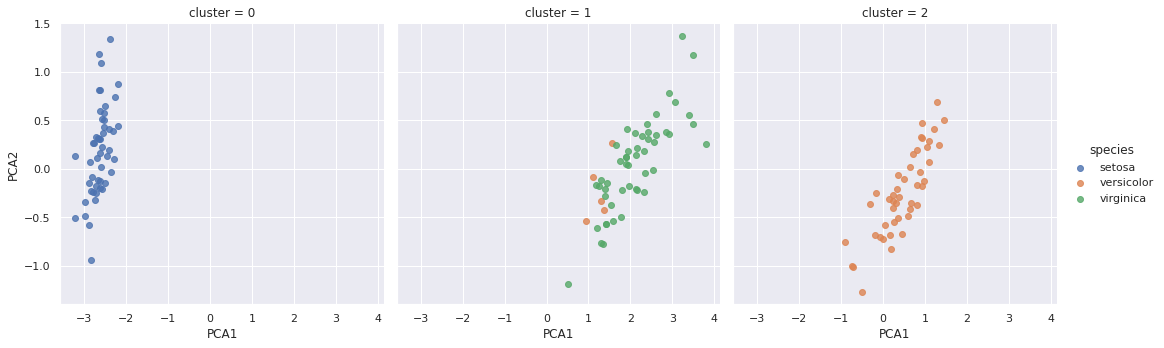

In [ ]:
iris_sns['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris_sns, hue='species', col='cluster', fit_reg=False)

#【補充】

# 監督式學習-決策樹

In [ ]:
#匯入決策樹DTC包
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#訓練
clf = DecisionTreeClassifier()   #max_depth=4
clf.fit(iris.data, iris.target)
#預測
predicted = clf.predict(iris.data)

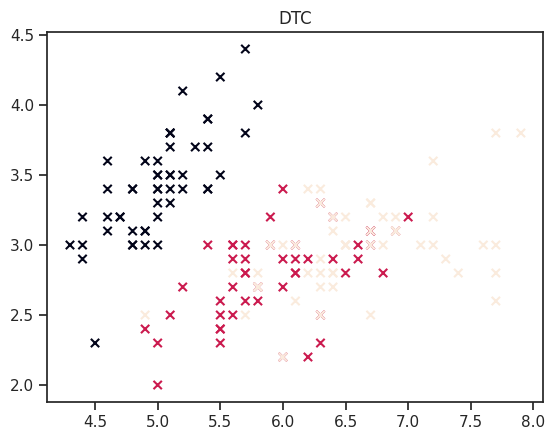

In [ ]:
#繪圖
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(L1, L2, c=predicted, marker='x')  #cmap=plt.cm.Paired
plt.title("DTC")
plt.show()

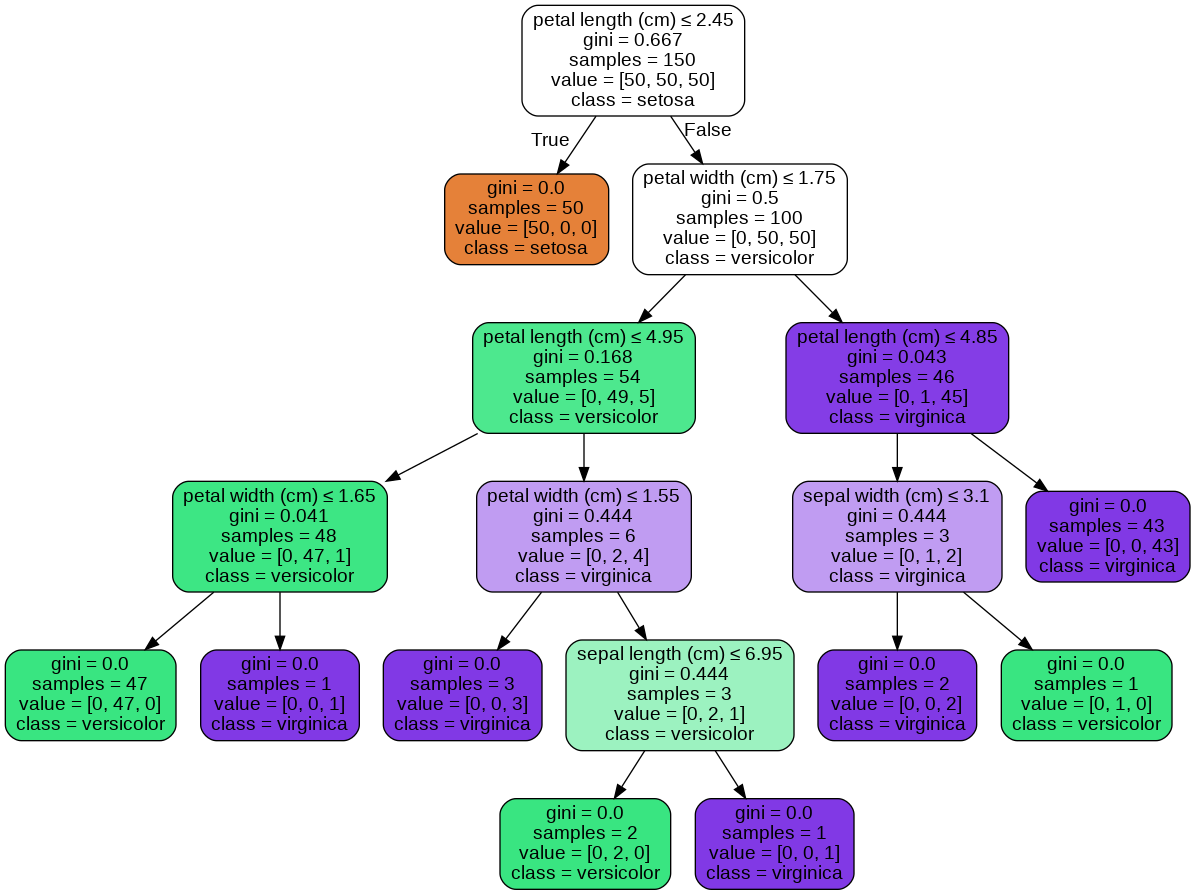

In [ ]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# 顯示預測準確率
acc = calc_acc(iris_Y_2, predicted)
print('the accuracy is', acc) 

the accuracy is 1.0


# THE END

In [ ]:
# 績效
accuracy = metrics.accuracy_score(iris_Y_2, predicted)
print('the accuracy is', accuracy) 

1.0


In [ ]:
if __name__ == '__main__':
    
    iris = datasets.load_iris()

    x = iris.get('data')
    y = iris.get('target')

    # 隨機劃分訓練集和測試集
    num = x.shape[0] # 樣本總數
    ratio = 7/3 # 劃分比例，訓練集數目:測試集數目
    num_test = int(num/(1+ratio)) # 測試集樣本數目
    num_train = num -  num_test # 訓練集樣本數目
    index = np.arange(num) # 產生樣本標號
    np.random.shuffle(index) # 洗牌
    x_test = x[index[:num_test],:] # 取出洗牌後前 num_test 作為測試集
    y_test = y[index[:num_test]]
    x_train = x[index[num_test:],:] # 剩餘作為訓練集
    y_train = y[index[num_test:]]

    kmeans = cluster.KMeans(n_clusters=3)
    kmeans.fit(x_train)

    centers = kmeans.cluster_centers_
    for i in range(3):
        index = y_train == i
        p = kmeans.predict(x_train[index,:])
        pp = mode(p) # 求實際類別為 i 所對應的類別標號 pp
        kmeans.cluster_centers_[i] = centers[pp] # 相應的調整類別標號，以正確預測

    y_test_pre = kmeans.predict(x_test)
    print("y_test_pre:")
    print(y_test_pre)
    print("y_test:")
    print(y_test)

    # 計算分類準確率
    acc = calc_acc(y_test_pre, y_test)
    print('the accuracy is', acc) # 顯示預測準確率

y_test_pre:
[1 1 1 1 1 1 0 2 0 2 0 0 1 1 0 1 2 2 0 2 0 1 2 0 2 1 1 1 1 1 2 1 2 2 1 1 2
 1 2 2 2 0 1 2 0]
y_test:
[1 1 1 1 1 1 0 1 0 2 0 0 1 1 0 1 2 2 0 2 0 2 2 0 2 2 2 2 1 1 2 1 2 2 1 1 2
 1 2 2 2 0 1 2 0]
the accuracy is 0.8888888888888888


# 結論
* 在分群演算法之下，我們發現 setosa 品種與 versicolor 及 virginica 的在花瓣與萼片的差異較大

# 參考資料
* [EX 10:_K-means群聚法](https://machine-learning-python.kspax.io/clustering/ex10_k-means_clustering)
* [[第 24 天] 機器學習（4）分群演算法](https://ithelp.ithome.com.tw/articles/10187314)
* 階層式：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Kmeans：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html
* Kmeans手刻版：https://medium.com/@a4793706/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-k-means-clustering-in-python-%E9%99%84%E7%A8%8B%E5%BC%8F%E7%A2%BC%E4%BB%8B%E7%B4%B9-55c19bcf2280
* [[機器學習首部曲] 聚類分析 K-means / K-medoids](https://pyecontech.com/2020/05/19/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E9%A6%96%E9%83%A8%E6%9B%B2-%E8%81%9A%E9%A1%9E%E5%88%86%E6%9E%90-k-means-k-medoids/)
* [R筆記–(9)分群分析(Clustering)](https://rpubs.com/skydome20/R-Note9-Clustering)
* 決策樹：https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/466616/